<a href="https://colab.research.google.com/github/djdongjae/DataAnalysis/blob/main/9%EC%9E%A5_%EC%8B%A4%EC%8A%B5%EC%98%88%EC%A0%9C_%EC%98%A4%EB%8F%99%EC%9E%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

#[09-1] '한국복지패널 데이터' 분석 준비하기

(1) 데이터 분석 준비하기

In [ ]:
pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#데이터 불러오기
raw_welfare = pd.read_spss('/content/drive/MyDrive/데이터분석입문/Doit_Python-main/Data/Koweps_hpwc14_2019_beta2.sav')

#복사본 만들기
welfare = raw_welfare.copy()

In [ ]:
#데이터 검토하기
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [ ]:
welfare.shape

(14418, 830)

In [ ]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [ ]:
welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [ ]:
welfare = welfare.rename(
    columns = {'h14_g3' : 'sex',
               'h14_g4' : 'birth',
               'h14_g10' : 'marriage_type',
               'h14_g11' : 'religion',
               'p1402_8aq1' : 'income',
               'h14_eco9' : 'code_job',
               'h14_reg7' : 'code_region'}
)

# [09-2] 성별에 따른 월급차이 - 성별에 따라 월급이 다를까?

In [ ]:
welfare['sex'].dtypes

dtype('float64')

In [ ]:
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [ ]:
welfare['sex'] = np.where(welfare['sex']==9, np.nan, welfare['sex'])
welfare['sex'].isna().sum()

0

In [ ]:
welfare['sex'] = np.where(welfare['sex']==1, 'male', 'female')
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

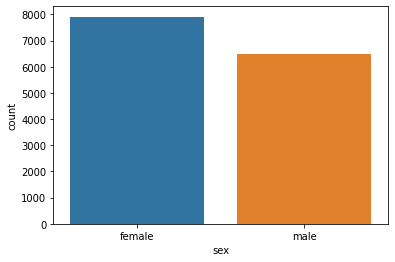

In [ ]:
sns.countplot(data = welfare, x = 'sex')

In [ ]:
welfare['income'].dtypes

dtype('float64')

In [ ]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

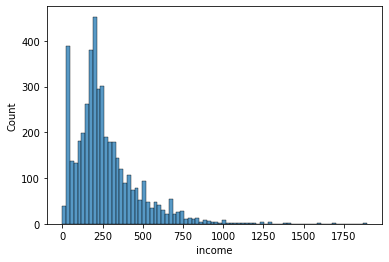

In [ ]:
sns.histplot(data = welfare, x = 'income')

In [ ]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [ ]:
welfare['income'].isna().sum()

9884

In [ ]:
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])
welfare['income'].isna().sum()

9884

In [ ]:
sex_income = welfare.dropna(subset=['income']).groupby('sex', as_index=False).agg(mean_income=('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


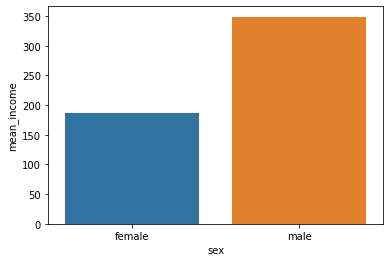

In [ ]:
sns.barplot(data=sex_income, x='sex', y='mean_income')

#[09-3] 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?

In [ ]:
welfare['birth'].dtypes

dtype('float64')

In [ ]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

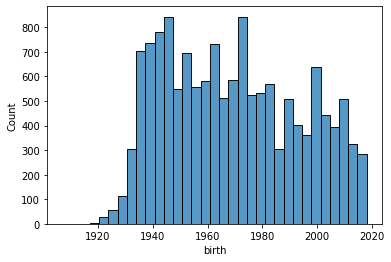

In [ ]:
sns.histplot(data=welfare, x='birth')

In [ ]:
welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [ ]:
welfare['birth'].isna().sum()

0

In [ ]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

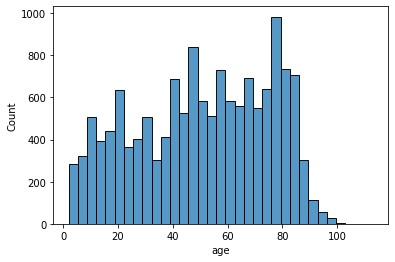

In [ ]:
sns.histplot(data = welfare, x = 'age')

In [ ]:
age_income = welfare.dropna(subset = ['income']).groupby('age').agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


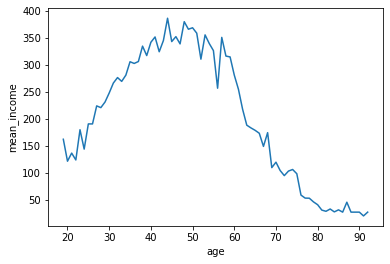

In [ ]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

#[09-4] 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?

In [ ]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [ ]:
welfare = welfare.assign(ageg = np.where(welfare['age']<30, 'young', np.where(welfare['age']<=59, 'middle', 'old')))
welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

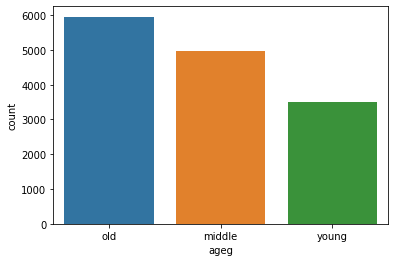

In [ ]:
sns.countplot(data=welfare, x='ageg')

In [ ]:
ageg_income = welfare.dropna(subset=['income']).groupby('ageg', as_index=False).agg(mean_income=('income', 'mean'))

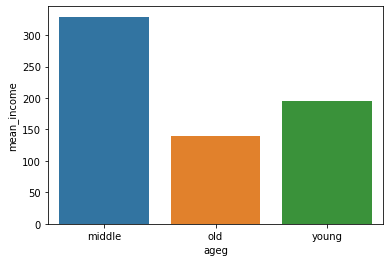

In [ ]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

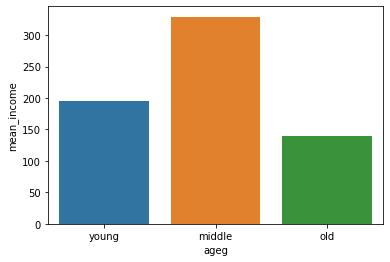

In [ ]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old'])

#[09-5] 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?

In [ ]:
sex_income = welfare.dropna(subset = ['income']).groupby(['ageg', 'sex'], as_index=False).agg(mean_income=('income', 'mean'))

In [ ]:
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


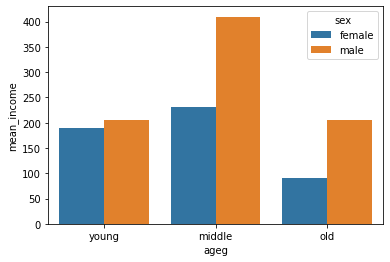

In [ ]:
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex', order=['young', 'middle', 'old'])

In [ ]:
sex_age = welfare.dropna(subset=['income']).groupby(['age', 'sex'], as_index=False).agg(mean_income=('income', 'mean'))

In [ ]:
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


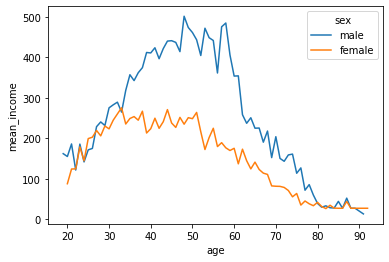

In [ ]:
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

In [ ]:
welfare['code_job'].dtypes

dtype('float64')

In [ ]:
welfare['code_job'].value_counts()

611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: code_job, Length: 150, dtype: int64

In [ ]:
list_job = pd.read_excel('/content/drive/MyDrive/데이터분석입문/Doit_Python-main/Data/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')

In [ ]:
list_job.shape

(156, 2)

In [ ]:
welfare = welfare.merge(list_job, how='left', on='code_job')

In [ ]:
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [ ]:
job_income = welfare.dropna(subset=['job', 'income']).groupby('job', as_index=False).agg(mean_income=('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [ ]:
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0, flags=flags)


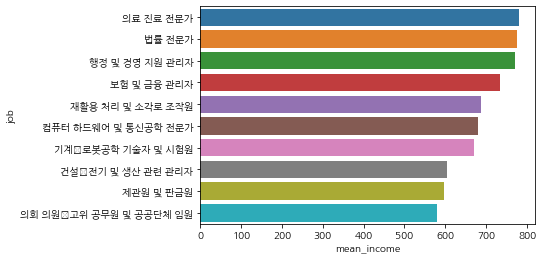

In [ ]:
sns.barplot(data = top10, y = 'job', x = 'mean_income')

In [ ]:
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0, flags=flags)


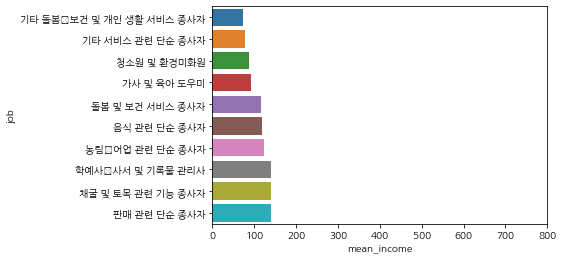

In [ ]:
sns.barplot(data=bottom10, y='job', x='mean_income').set(xlim=(0,800))

#[09-7] 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까

In [ ]:
job_male = welfare.dropna(subset=['job']).query('sex=="male"').groupby('job', as_index=False).agg(n=('job', 'count')).sort_values('n', ascending=False).head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [ ]:
job_female = welfare.dropna(subset=['job']).query('sex=="female"').groupby('job', as_index=False).agg(n=('job', 'count')).sort_values('n', ascending=False).head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

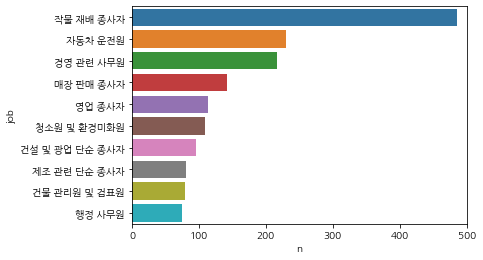

In [ ]:
sns.barplot(data=job_male, y='job', x='n').set(xlim=(0,500))

[(0.0, 500.0)]

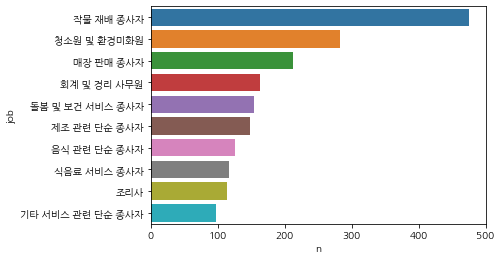

In [ ]:
sns.barplot(data=job_female, y='job', x='n').set(xlim=(0,500))

#[09-8] 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?

In [ ]:
welfare['religion'].dtypes

dtype('float64')

In [ ]:
welfare['religion'].value_counts()

2.0    7815
1.0    6603
Name: religion, dtype: int64

In [ ]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare['religion'].value_counts()

no     7815
yes    6603
Name: religion, dtype: int64

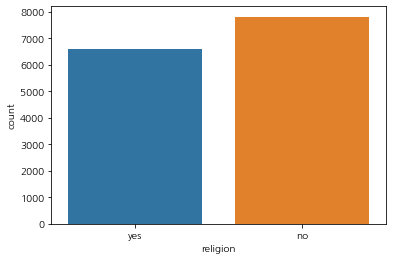

In [ ]:
sns.countplot(data = welfare, x = 'religion')

In [ ]:
welfare['marriage_type'].dtypes

dtype('float64')

In [ ]:
welfare['marriage_type'].value_counts()

1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: marriage_type, dtype: int64

In [ ]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage', np.where(welfare['marriage_type']==3, 'divorce', 'etc'))

In [ ]:
n_divorce = welfare.groupby('marriage', as_index=False).agg(n=('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


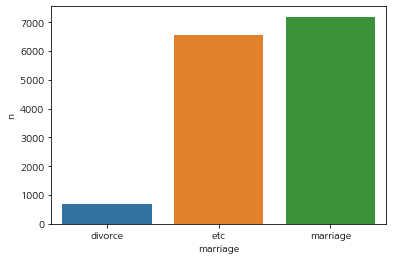

In [ ]:
sns.barplot(data=n_divorce, x='marriage', y='n')

종교유무에 따른 이혼율 분석하기

263

In [ ]:
rel_div = welfare\
.query('marriage != "etc"')\
.groupby(['religion', 'marriage'], as_index = False)\
.agg(count = ('marriage', 'count'))

rel_div_n = rel_div\
.query('marriage != "etc"')\
.groupby(['religion'], as_index = False)\
.agg(total = ('count', 'sum'))

rel_div = rel_div.merge(rel_div_n, how = 'left', on = 'religion')

rel_div['proportion'] = rel_div['count'] / rel_div['total']

rel_div

In [ ]:
rel_div = rel_div\
.query('marriage == "divorce"')\
.assign(proportion=rel_div['proportion']*100)\
.round(1)

rel_div

,religion,marriage,count,total,proportion
0,no,divorce,384,4044,9.5
2,yes,divorce,305,3835,8.0


264

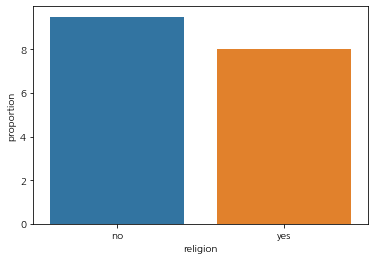

In [ ]:
sns.barplot(data=rel_div, x="religion", y='proportion')

연령대 및 종교 유무에 따른 이혼율 분석하기

In [ ]:
age_div = welfare.query('marriage != "etc"').groupby(['ageg', 'marriage'], as_index = False).agg(count = ('marriage', 'count'))

In [ ]:
age_div = welfare.query('marriage != "etc"').groupby(['ageg', 'marriage'], as_index = False).agg(count = ('marriage', 'count'))

In [ ]:
age_div = age_div.merge(age_div_n, how = 'left', on = 'ageg')

In [ ]:
age_div['proportion'] = age_div['count'] / age_div['total']

In [ ]:
age_div

,ageg,marriage,count,total,proportion
0,middle,divorce,350,3902,0.089698
1,middle,marriage,3552,3902,0.910302
2,old,divorce,336,3917,0.085780
3,old,marriage,3581,3917,0.914220
4,young,divorce,3,60,0.050000
5,young,marriage,57,60,0.950000


In [ ]:
age_div = age_div.query('ageg != "young" & marriage == "divorce"').assign(proportion = age_div['proportion']*100).round(1)

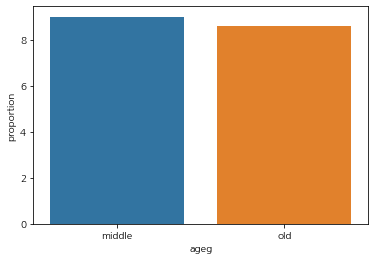

In [ ]:
sns.barplot(data = age_div, x = "ageg", y = 'proportion')

In [ ]:
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"').groupby(['ageg', 'religion', 'marriage'], as_index=False).agg(count=('marriage', 'count'))
age_rel_div

,ageg,religion,marriage,count
0,middle,no,divorce,213
1,middle,no,marriage,2028
2,middle,yes,divorce,137
3,middle,yes,marriage,1524
4,old,no,divorce,168
5,old,no,marriage,1589
6,old,yes,divorce,168
7,old,yes,marriage,1992


In [ ]:
age_rel_div_sum = age_rel_div.query('marriage != "etc"').groupby(['ageg', 'religion'], as_index = False).agg(total = ('count', 'sum'))
age_rel_div_sum

,ageg,religion,total
0,middle,no,2241
1,middle,yes,1661
2,old,no,1757
3,old,yes,2160


In [ ]:
age_rel_div = age_rel_div.merge(age_rel_div_sum, how = 'left', on = ['ageg', 'religion'], sort=False)
age_rel_div

,ageg,religion,marriage,count,total
0,middle,no,divorce,213,2241
1,middle,no,marriage,2028,2241
2,middle,yes,divorce,137,1661
3,middle,yes,marriage,1524,1661
4,old,no,divorce,168,1757
5,old,no,marriage,1589,1757
6,old,yes,divorce,168,2160
7,old,yes,marriage,1992,2160


In [ ]:
age_rel_div['proportion'] = age_rel_div['count'] / age_rel_div['total']

In [ ]:
age_rel_div = age_rel_div.query('marriage == "divorce"').assign(proportion = age_rel_div['proportion']*100).round(1)

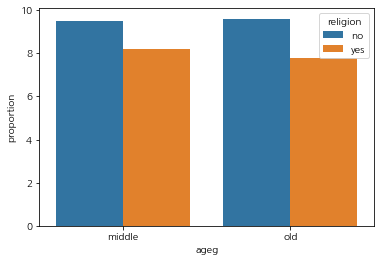

In [ ]:
sns.barplot(data=age_rel_div, x='ageg', y='proportion', hue='religion')

#[09-9] 지역별 연령대 비율 - 어느 지역에 노년층 비율이 많을까?

In [ ]:
welfare['code_region'].dtypes

dtype('float64')

In [ ]:
welfare['code_region'].value_counts()

2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: code_region, dtype: int64

In [ ]:
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region' : ['서울',
                                        '수도권(인천/경기)',
                                        '부산/경남/울산',
                                        '대구/경북',
                                        '대전/충남',
                                        '강원/충북',
                                        '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [ ]:
welfare = welfare.merge(list_region, how='left', on='code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [ ]:
region_ageg = welfare.groupby(['region', 'ageg'], as_index=False).agg(count=('region','count'))

In [ ]:
region_ageg_sum = region_ageg.groupby(['region'], as_index = False).agg(total = ('count', 'sum'))

In [ ]:
region_ageg = region_ageg.merge(region_ageg_sum, how='left', on='region', sort = False)

In [ ]:
region_ageg['proportion'] = region_ageg['count']/region_ageg['total']
region_ageg

,region,ageg,count,total,proportion
0,강원/충북,middle,351,1137,0.308707
1,강원/충북,old,522,1137,0.459103
2,강원/충북,young,264,1137,0.232190
3,광주/전남/전북/제주도,middle,784,2466,0.317924
4,광주/전남/전북/제주도,old,1108,2466,0.449311
5,광주/전남/전북/제주도,young,574,2466,0.232766
6,대구/경북,middle,512,1728,0.296296
7,대구/경북,old,871,1728,0.504051
8,대구/경북,young,345,1728,0.199653
9,대전/충남,middle,468,1391,0.336449


In [ ]:
region_ageg = region_ageg.assign(proportion = region_ageg['proportion']*100).round(1)

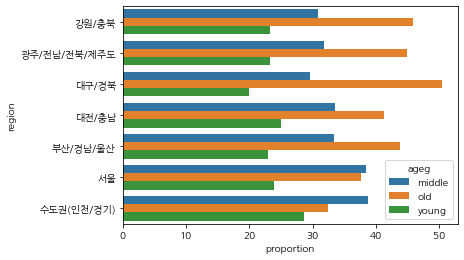

In [ ]:
sns.barplot(data=region_ageg, y='region', x='proportion', hue='ageg')

In [ ]:
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index='region', columns='ageg', values='proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


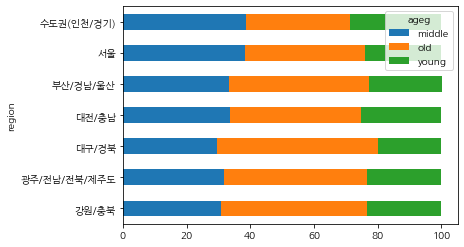

In [ ]:
pivot_df.plot.barh(stacked=True)

In [ ]:
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


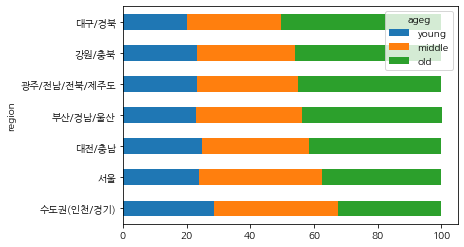

In [ ]:
reorder_df.plot.barh(stacked=True)